In [3]:
import pandas as pd

# Caminho do arquivo CSV
file_path = 'C:\\Users\\User\\OneDrive\\Área de Trabalho\\InteligenciaArtificial\\PROJETO 4\\dep_pos_parto.csv'

# Carregar o arquivo CSV
data = pd.read_csv(file_path)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

data.drop('data_hora', axis=1, inplace=True)

print(data.isnull().sum())

imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Codificar variáveis categóricas
label_encoders = {}
for column in data_imputed.columns:
    le = LabelEncoder()
    data_imputed[column] = le.fit_transform(data_imputed[column])
    label_encoders[column] = le

# Separar as características e o alvo
X = data_imputed.drop('tentativa de suicídio', axis=1)
y = data_imputed['tentativa de suicídio']

# Dividir o dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Mostrar as primeiras linhas do conjunto de treino
X_train.head(), y_train.head()


idade                                                0
sensação de tristeza ou choro                        0
irritabilidade com o bebê e o parceiro               6
dificuldade para dormir à Nãoite                     0
problemas de concentração ou para tomar decisões    12
comer demais ou perda de apetite                     0
sensação de ansiedade                                0
sensação de culpa                                    9
problemas de vínculo com o bebê                      0
tentativa de suicídio                                0
dtype: int64


(      idade  sensação de tristeza ou choro  \
 428       3                              0   
 868       1                              2   
 1332      0                              0   
 548       1                              0   
 106       2                              0   
 
       irritabilidade com o bebê e o parceiro  \
 428                                        1   
 868                                        1   
 1332                                       2   
 548                                        1   
 106                                        1   
 
       dificuldade para dormir à Nãoite  \
 428                                  0   
 868                                  1   
 1332                                 2   
 548                                  0   
 106                                  2   
 
       problemas de concentração ou para tomar decisões  \
 428                                                  1   
 868                                      

K-NN Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       142
           1       0.80      0.78      0.79        67
           2       0.88      0.76      0.81        92

    accuracy                           0.83       301
   macro avg       0.83      0.81      0.82       301
weighted avg       0.83      0.83      0.83       301



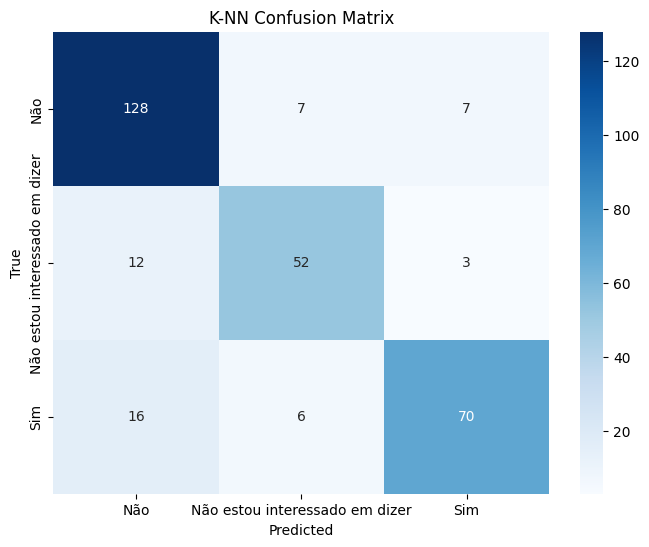

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       142
           1       0.97      0.99      0.98        67
           2       0.97      1.00      0.98        92

    accuracy                           0.98       301
   macro avg       0.98      0.99      0.98       301
weighted avg       0.98      0.98      0.98       301



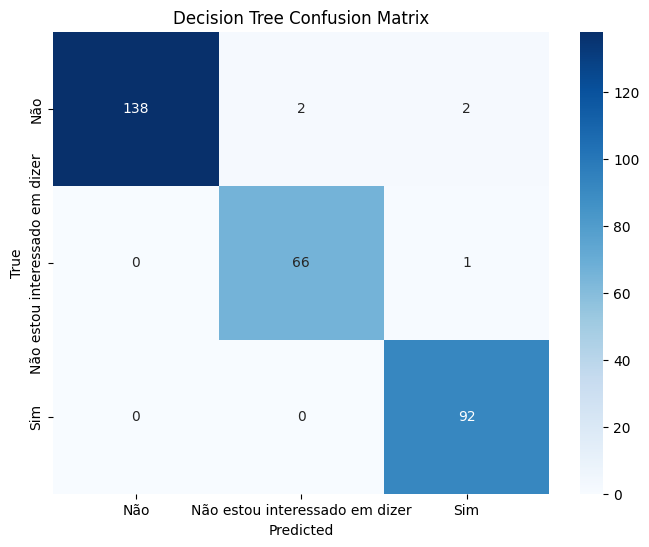

Naïve Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.68      0.65       142
           1       0.48      0.46      0.47        67
           2       0.62      0.57      0.59        92

    accuracy                           0.59       301
   macro avg       0.58      0.57      0.57       301
weighted avg       0.59      0.59      0.59       301



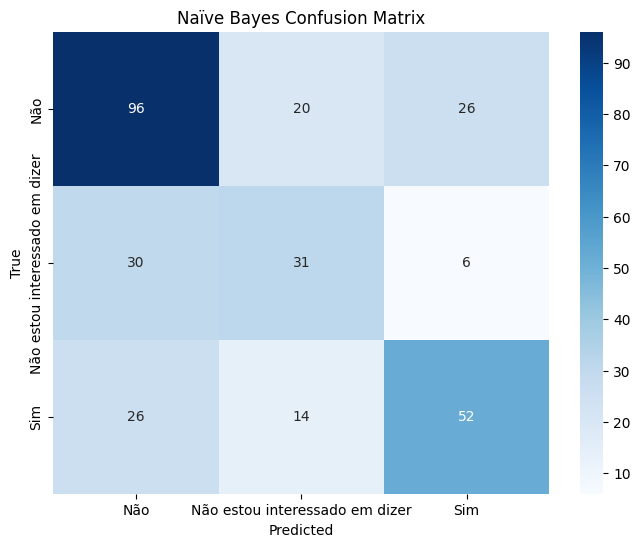

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, classes, title):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# 1. K-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("K-NN Classification Report:\n", classification_report(y_test, y_pred_knn))
plot_confusion_matrix(y_test, y_pred_knn, classes=label_encoders['tentativa de suicídio'].classes_, title='K-NN Confusion Matrix')

# 2. Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
plot_confusion_matrix(y_test, y_pred_dt, classes=label_encoders['tentativa de suicídio'].classes_, title='Decision Tree Confusion Matrix')

# 3. Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naïve Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
plot_confusion_matrix(y_test, y_pred_nb, classes=label_encoders['tentativa de suicídio'].classes_, title='Naïve Bayes Confusion Matrix')


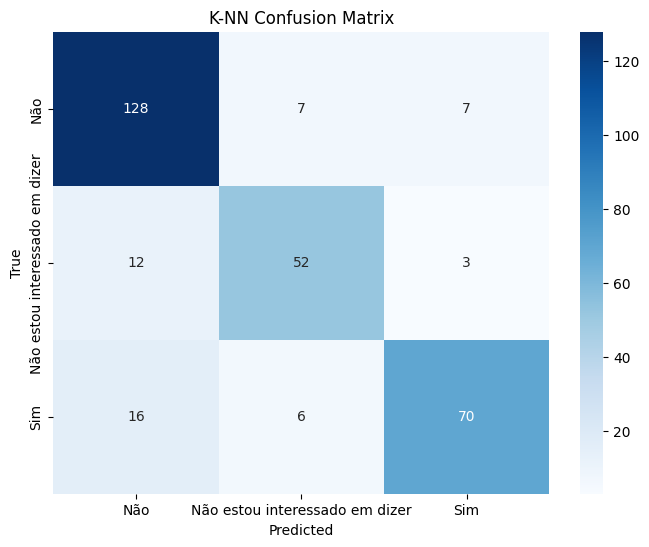

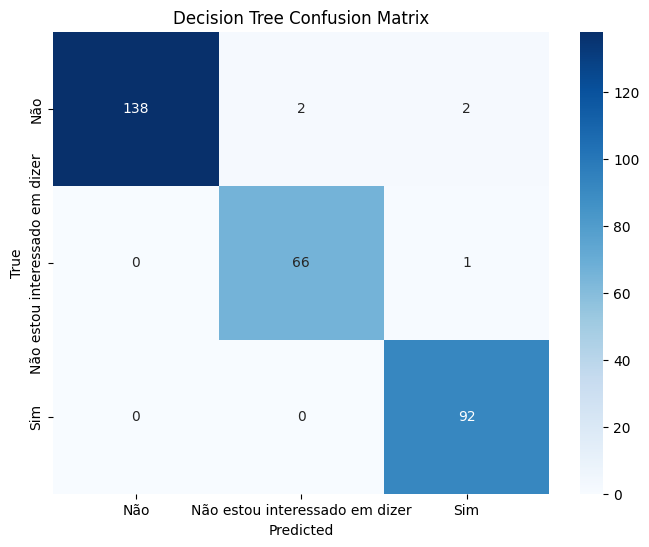

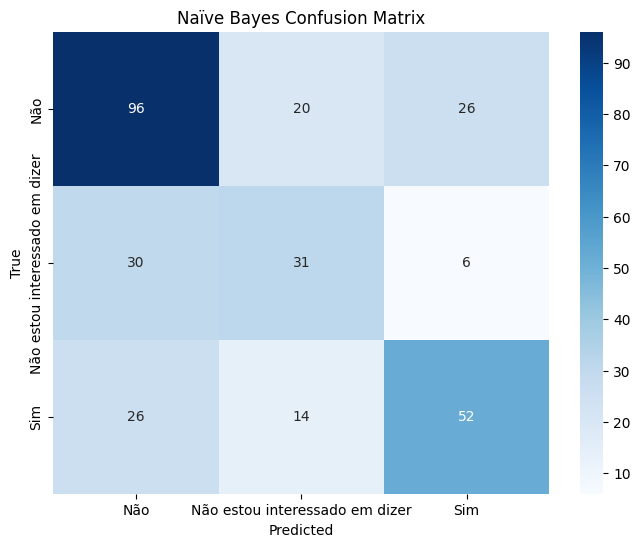

('              precision    recall  f1-score   support\n\n           0       0.82      0.90      0.86       142\n           1       0.80      0.78      0.79        67\n           2       0.88      0.76      0.81        92\n\n    accuracy                           0.83       301\n   macro avg       0.83      0.81      0.82       301\nweighted avg       0.83      0.83      0.83       301\n',
 '              precision    recall  f1-score   support\n\n           0       1.00      0.97      0.99       142\n           1       0.97      0.99      0.98        67\n           2       0.97      1.00      0.98        92\n\n    accuracy                           0.98       301\n   macro avg       0.98      0.99      0.98       301\nweighted avg       0.98      0.98      0.98       301\n',
 '              precision    recall  f1-score   support\n\n           0       0.63      0.68      0.65       142\n           1       0.48      0.46      0.47        67\n           2       0.62      0.57      0.59

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, classes, title):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# 1. K-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_report = classification_report(y_test, y_pred_knn)
plot_confusion_matrix(y_test, y_pred_knn, classes=label_encoders['tentativa de suicídio'].classes_, title='K-NN Confusion Matrix')

# 2. Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

dt_report = classification_report(y_test, y_pred_dt)
plot_confusion_matrix(y_test, y_pred_dt, classes=label_encoders['tentativa de suicídio'].classes_, title='Decision Tree Confusion Matrix')

# 3. Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

nb_report = classification_report(y_test, y_pred_nb)
plot_confusion_matrix(y_test, y_pred_nb, classes=label_encoders['tentativa de suicídio'].classes_, title='Naïve Bayes Confusion Matrix')

knn_report, dt_report, nb_report
